# Exercise 1 - introducing t-test 

You have already learned about the the command line, scripts, and functions. R has one more level of organisation. Packages. Packages are sets of functions. We have already used one of these. Packages can also include data. We are now going to install a package, load it, and use it just for it's data. 

The package level is what makes R so powerful as a an open source language. you can make a package, get it reviewed, and have it stored on CRAN (Comprehensive R Archive Network) where everyone can download it. This means that R is an active environment for the development of statistical methods and theory.

Description of the package here: https://simplystatistics.org/2018/01/22/the-dslabs-package-provides-datasets-for-teaching-data-science/

In [1]:
install.packages('dplyr') # for functions
install.packages('ggplot2') # for plotting
install.packages('dslabs') # for data

Installing package into ‘/usr/local/spark-3.5.2-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/spark-3.5.2-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)



In [9]:
library(dslabs)
library(dplyr)
library(ggplot2)

Let's conduct an analysis of the height data - self-reported heights in inches

In [3]:
data("heights")

This gives us a data frame.

In [5]:
str(heights)

'data.frame':	1050 obs. of  2 variables:
 $ sex   : Factor w/ 2 levels "Female","Male": 2 2 2 2 2 1 1 1 1 2 ...
 $ height: num  75 70 68 74 61 65 66 62 66 67 ...


In [ ]:
# QUESTIONS 
# - tell me about the data frame
# - from the lecture, what is the first thing we should do?

First let's make frequency distributions for the women and men seperately.

You can make some quick and dirty separate plots using a basic function and indexing...

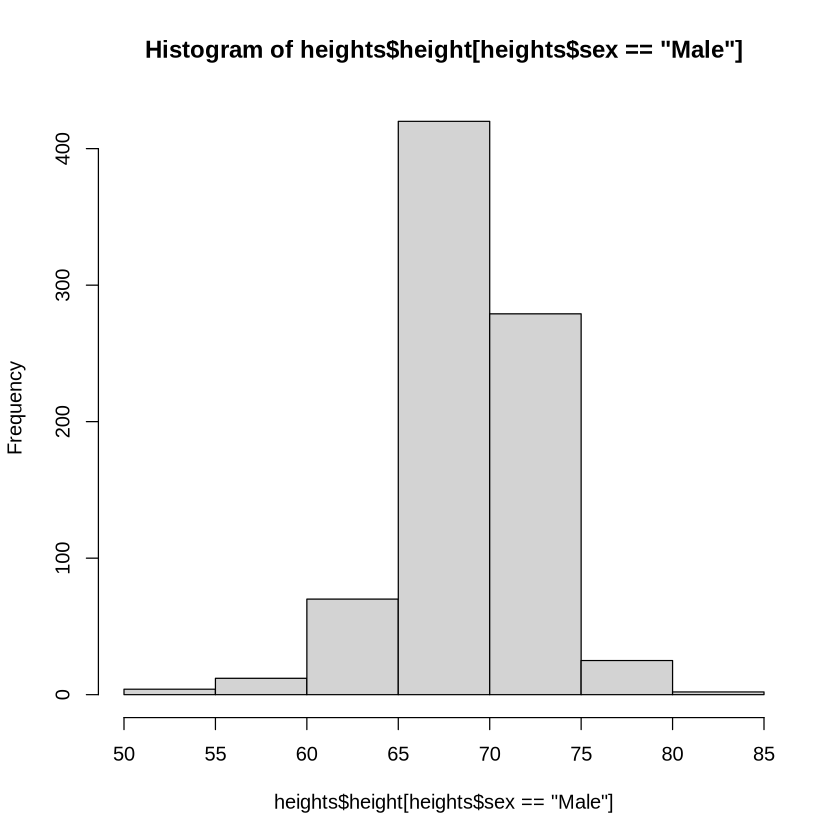

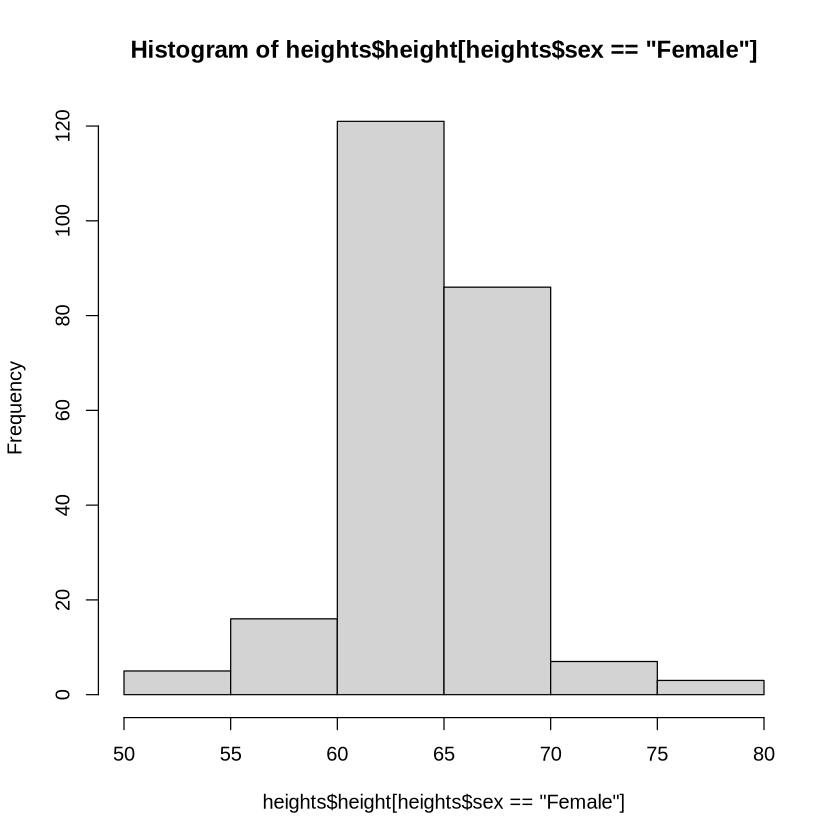

In [6]:
hist(heights$height[heights$sex=="Male"])
hist(heights$height[heights$sex=="Female"])

... though it would be better if we could see all the data together on the same histogram

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


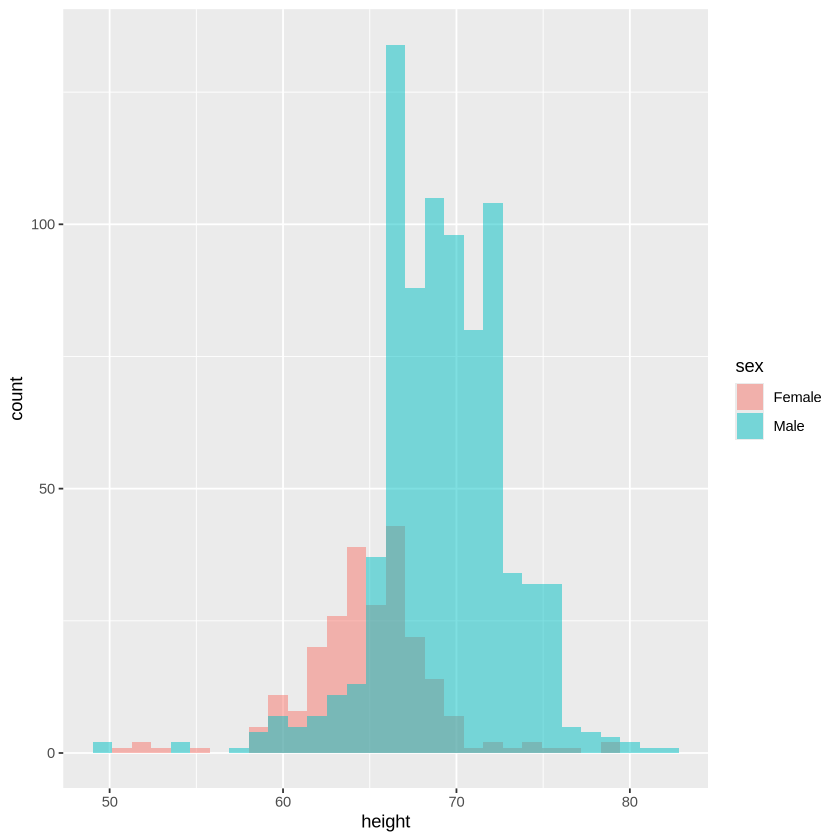

In [10]:
ggplot(data = heights,
       aes(x = height, 
           fill = sex)) +
  geom_histogram(position = 'identity', 
                 alpha = 0.5)

In [ ]:
# what happens if we don't use position = 'identity'? let's test it!

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


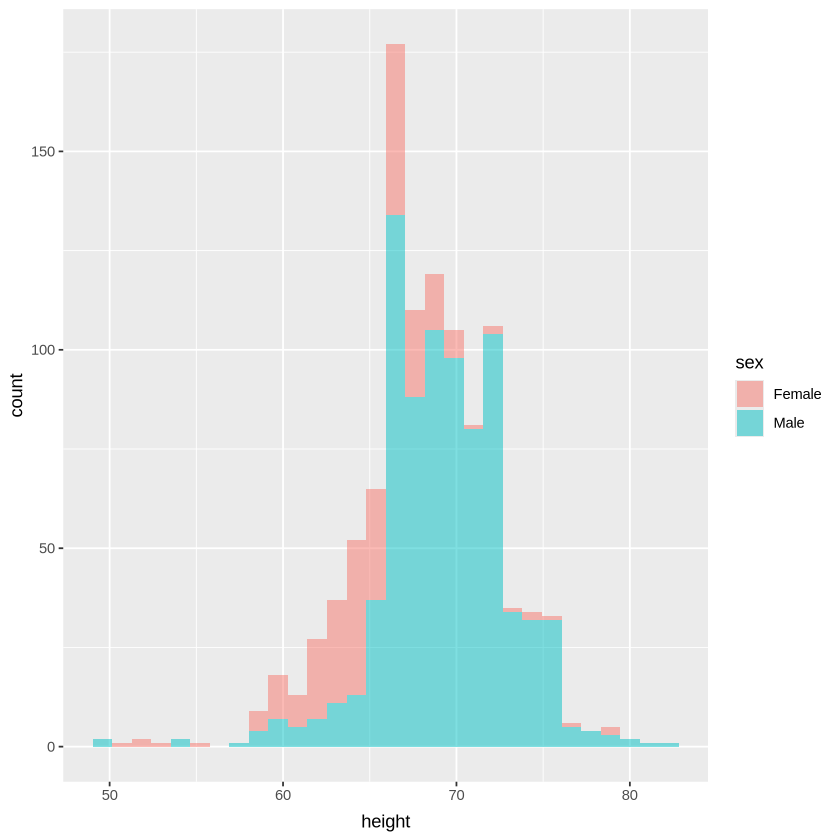

In [11]:
ggplot(data = heights,
       aes(x = height, 
           fill = sex)) +
  geom_histogram(alpha = 0.5)

In [ ]:
# sometimes your groups are of different size. make sure to pay attention to 
# the y axis too, not just the x axis!

In [ ]:
# here 'identity' ensures that it is the count rather than the proportion being plotted
# 'alpha' makes the bars partly transparent

In [ ]:
# QUESTIONS
# what can we say about the data from these frequency distributions?
# From the lecture, what is the next step?

Let's look at the summary statistics - you can actually make them in 1 table!

In [12]:
stats_table <- heights %>% 
  group_by(sex) %>% 
  summarise(mean_height = mean(height),
            median_height = median(height),
            sd_height = sd(height))

In [13]:
stats_table

sex,mean_height,median_height,sd_height
<fct>,<dbl>,<dbl>,<dbl>
Female,64.93942,64.98031,3.760656
Male,69.31475,69.00000,3.611024


In [ ]:
# QUESTIONS 
# What can we say about the male and female distributions from the summary statistics?
# can we formally test whether our distributions are normal?

In [14]:
shapiro.test(heights$height[heights$sex=="Male"])
shapiro.test(heights$height[heights$sex=="Female"])


	Shapiro-Wilk normality test

data:  heights$height[heights$sex == "Male"]
W = 0.96374, p-value = 2.623e-13



	Shapiro-Wilk normality test

data:  heights$height[heights$sex == "Female"]
W = 0.94255, p-value = 4.671e-08


In [ ]:
# You are looking for W-values close to 1 and p-values below 0.05.
# BUT the Shapiro Wilks test is EXTREMELY sensitive to the tails of the distribution. 
# (it is also too insensitive in small samples)
# It is safe to assume these distributions are normal. There is no unambiguous way to deal with this issue.

Lets try visualising the data in terms of probability distributions

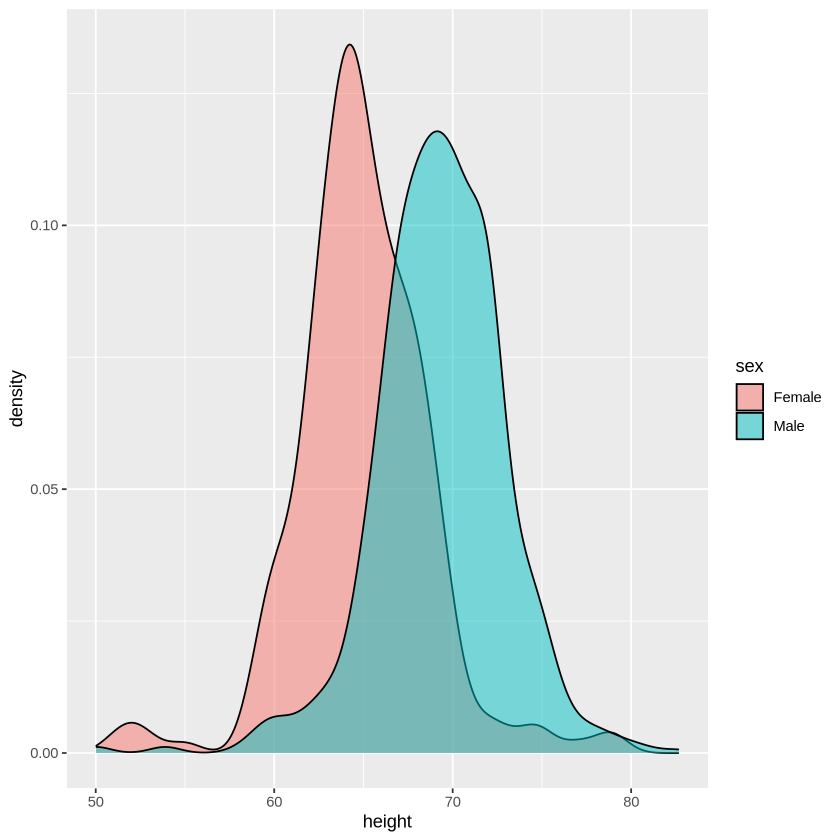

In [15]:
ggplot(heights, 
       aes(x = height, 
           fill = sex)) +
  geom_density(alpha = 0.5)

In [ ]:
# talk about these plots, what they mean, area under the curve, etc.

Now we are ready to run a hypothesis test. Are men taller than women? What sort of t test should we do?

In [16]:
t.test(height~sex,data=heights)


	Welch Two Sample t-test

data:  height by sex
t = -15.925, df = 374.41, p-value < 2.2e-16
alternative hypothesis: true difference in means between group Female and group Male is not equal to 0
95 percent confidence interval:
 -4.915553 -3.835108
sample estimates:
mean in group Female   mean in group Male 
            64.93942             69.31475 


In [ ]:
# DISCUSSION
# What do the numbers mean? How do we read the table?
# what do you notice about the degrees of freedom?
# The formula is different from the lecture. Here we use Welch's t-test, which does not use the 
# square root of the pooled variance, but rather of the variance from each group, divided by the 
# n for that group

# Exercise 2 - Some more messy real world data

We have been dealing with data that is fairly well organised. Let's look at some data that is slightly more messy

Install and load the fuelconomy package, which has fuel economy data from the EPA: https://cran.r-project.org/web/packages/fueleconomy/fueleconomy.pdf

In [17]:
install.packages('fueleconomy')

Installing package into ‘/usr/local/spark-3.5.2-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)



In [18]:
library(fueleconomy)

In [19]:
data(vehicles)

In [24]:
str(vehicles)

tibble [33,442 × 12] (S3: tbl_df/tbl/data.frame)
 $ id   : num [1:33442] 13309 13310 13311 14038 14039 ...
 $ make : chr [1:33442] "Acura" "Acura" "Acura" "Acura" ...
 $ model: chr [1:33442] "2.2CL/3.0CL" "2.2CL/3.0CL" "2.2CL/3.0CL" "2.3CL/3.0CL" ...
 $ year : num [1:33442] 1997 1997 1997 1998 1998 ...
 $ class: chr [1:33442] "Subcompact Cars" "Subcompact Cars" "Subcompact Cars" "Subcompact Cars" ...
 $ trans: chr [1:33442] "Automatic 4-spd" "Manual 5-spd" "Automatic 4-spd" "Automatic 4-spd" ...
 $ drive: chr [1:33442] "Front-Wheel Drive" "Front-Wheel Drive" "Front-Wheel Drive" "Front-Wheel Drive" ...
 $ cyl  : num [1:33442] 4 4 6 4 4 6 4 4 6 5 ...
 $ displ: num [1:33442] 2.2 2.2 3 2.3 2.3 3 2.3 2.3 3 2.5 ...
 $ fuel : chr [1:33442] "Regular" "Regular" "Regular" "Regular" ...
 $ hwy  : num [1:33442] 26 28 26 27 29 26 27 29 26 23 ...
 $ cty  : num [1:33442] 20 22 18 19 21 17 20 21 17 18 ...


Let's set ourselves the task of comparing the city fuel economy of the midsize class of two car brands: Audi and VW

Our first step is to isolate the relevant data. There are many ways to do this. Here's one:

In [20]:
Audi_Midsize <- vehicles %>%
    filter(make=="Audi") %>%
    filter(class=="Midsize Cars")

In [21]:
VW_Midsize <- vehicles %>%
    filter(make=="Volkswagen") %>%
    filter(class=="Midsize Cars")

How many cars do we have in each group?

In [27]:
nrow(Audi_Midsize)
nrow(VW_Midsize)

[1] 157

[1] 97

Let's use t.test to compare performance of the two cars

In [28]:
t.test(Audi_Midsize$cty,VW_Midsize$cty)


	Welch Two Sample t-test

data:  Audi_Midsize$cty and VW_Midsize$cty
t = -7.1511, df = 125.12, p-value = 6.348e-11
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -4.232765 -2.397743
sample estimates:
mean of x mean of y 
 16.29299  19.60825 


In [ ]:
# How should we interpret the output?

Let's visualise the data and see if this is the best way to ask our question

In [29]:
Audi_VW <- rbind(Audi_Midsize, VW_Midsize)

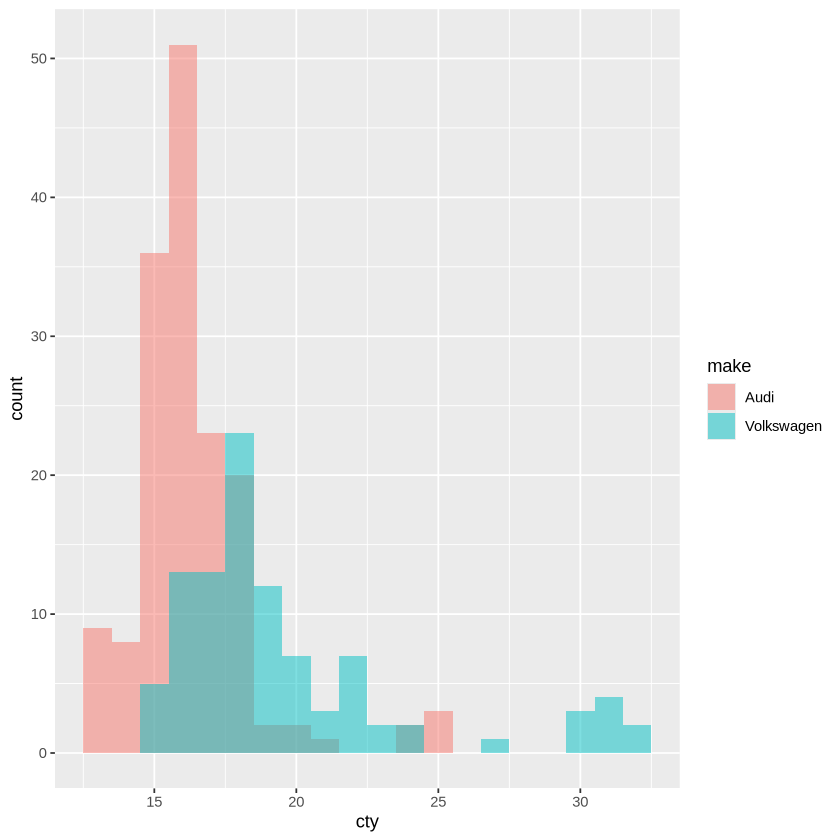

In [31]:
# histograms
ggplot(data = Audi_VW,
       aes(x = cty, 
           fill = make)) +
  geom_histogram(position = 'identity', 
                 alpha = 0.5,
                 bins = 20)

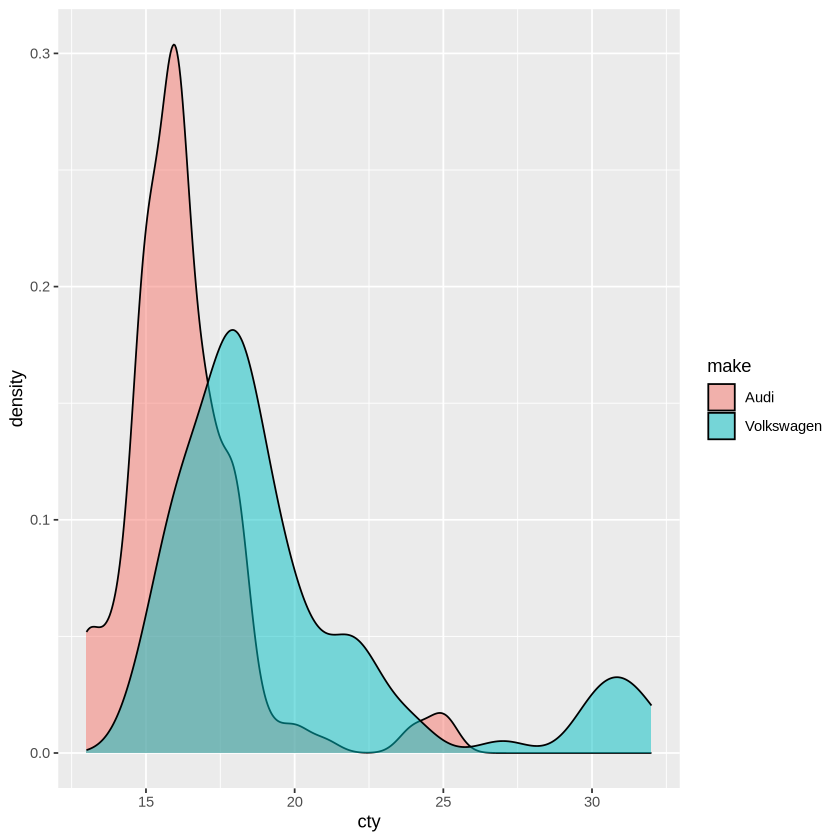

In [32]:
# density plots
ggplot(Audi_VW, aes(x = cty, fill = make)) +
  geom_density(alpha = 0.5)

We see that a normal distribution is an okay model for our data, but perhaps not the best one. We can see something important happening in the tails suggesting there is important structure we will miss.

Let's investigate that structure

In [33]:
str(Audi_VW)

tibble [254 × 12] (S3: tbl_df/tbl/data.frame)
 $ id   : num [1:254] 5656 5657 6784 6785 7908 ...
 $ make : chr [1:254] "Audi" "Audi" "Audi" "Audi" ...
 $ model: chr [1:254] "100" "100" "100" "100" ...
 $ year : num [1:254] 1989 1989 1990 1990 1991 ...
 $ class: chr [1:254] "Midsize Cars" "Midsize Cars" "Midsize Cars" "Midsize Cars" ...
 $ trans: chr [1:254] "Automatic 3-spd" "Manual 5-spd" "Automatic 3-spd" "Automatic 4-spd" ...
 $ drive: chr [1:254] "Front-Wheel Drive" "Front-Wheel Drive" "Front-Wheel Drive" "Front-Wheel Drive" ...
 $ cyl  : num [1:254] 5 5 5 5 5 6 6 6 6 6 ...
 $ displ: num [1:254] 2.3 2.3 2.3 2.3 2.3 2.8 2.8 2.8 2.8 2.8 ...
 $ fuel : chr [1:254] "Regular" "Regular" "Regular" "Regular" ...
 $ hwy  : num [1:254] 20 23 20 22 22 23 22 24 22 24 ...
 $ cty  : num [1:254] 17 16 16 16 16 15 17 17 17 17 ...


Let's make a scatterplot

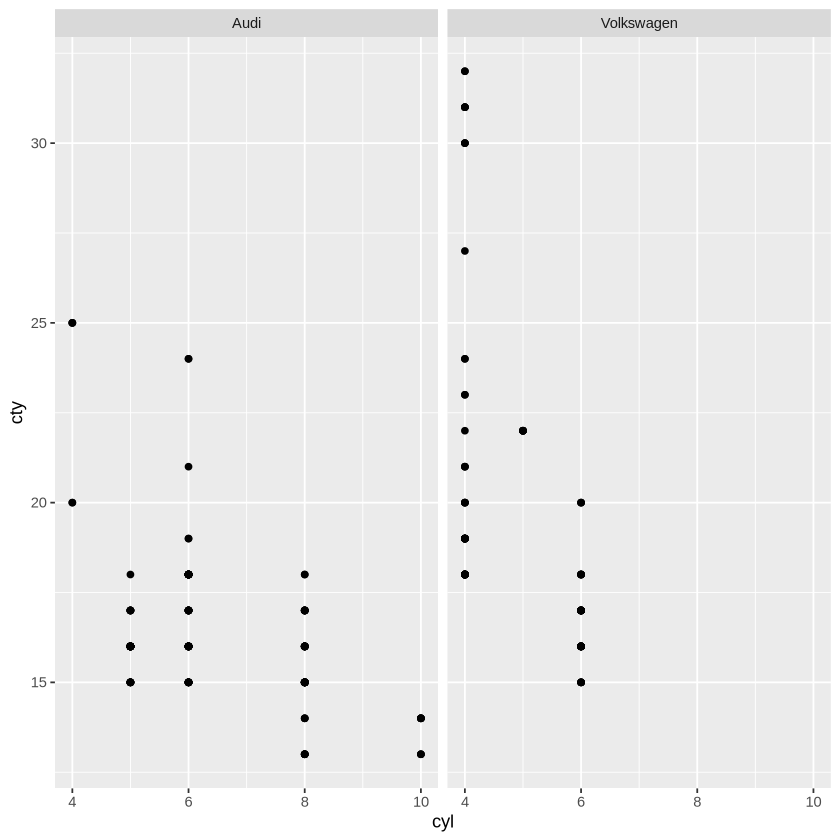

In [34]:
ggplot(data=Audi_VW,
       aes(x=cyl,
           y=cty)) +
  geom_point() +
  facet_wrap(~make)

In [ ]:
# Question: what's wrong with this plot? Hidden data. Over plotting. How can we deal with that.
# let's add a bit of jitter or noise so we can see all of the data points 

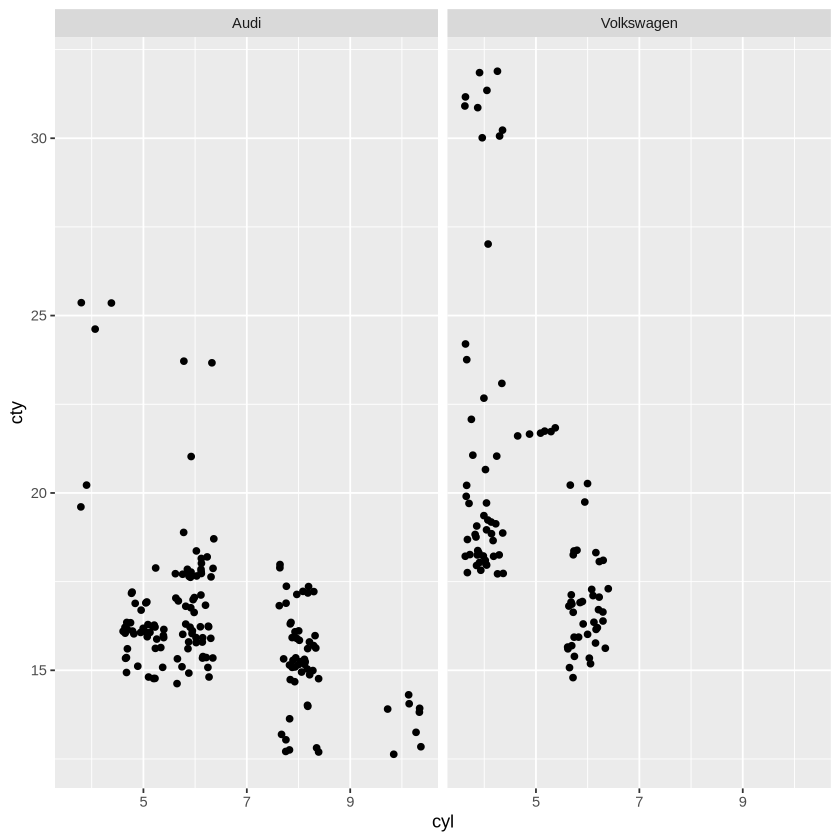

In [35]:
ggplot(data=Audi_VW,
       aes(x=cyl,
           y=cty)) +
  geom_point(position = 'jitter') +
  facet_wrap(~make)

In [36]:
# Question: what is the likely cause of the difference in fuel efficiency between audi and vw midsize cars?
# we'll learn how to address this question tomorrow when we discuss linear regression

In [ ]:
# You have learned about subsetting to create new data frames from larger data sets
# You have learned how to explore data to identify possible hidden correlates 